In [1]:
# Dataset can be accessed using (below) however, I have downloaded my dataset and will be using that.

#from datasets import load_dataset
#dataset = load_dataset("knkarthick/dialogsum")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data  = pd.read_csv("/Users/praggyaverma/Desktop/ML-Models/Text Summarizer Model/dataset/train.csv")
validation_data = pd.read_csv("/Users/praggyaverma/Desktop/ML-Models/Text Summarizer Model/dataset/validation.csv")
test_data = pd.read_csv("/Users/praggyaverma/Desktop/ML-Models/Text Summarizer Model/dataset/test.csv")

In [4]:
train_data.shape

(12460, 4)

In [5]:
validation_data.shape

(500, 4)

In [6]:
test_data.shape

(1500, 4)

In [7]:
train_data.head()

id                                           dialogue  \
0  train_0  #Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...   
1  train_1  #Person1#: Hello Mrs. Parker, how have you bee...   
2  train_2  #Person1#: Excuse me, did you see a set of key...   
3  train_3  #Person1#: Why didn't you tell me you had a gi...   
4  train_4  #Person1#: Watsup, ladies! Y'll looking'fine t...   

                                             summary              topic  
0  Mr. Smith's getting a check-up, and Doctor Haw...     get a check-up  
1  Mrs Parker takes Ricky for his vaccines. Dr. P...           vaccines  
2  #Person1#'s looking for a set of keys and asks...          find keys  
3  #Person1#'s angry because #Person2# didn't tel...  have a girlfriend  
4  Malik invites Nikki to dance. Nikki agrees if ...              dance

In [8]:
train_data["dialogue"][4]

"#Person1#: Watsup, ladies! Y'll looking'fine tonight. May I have this dance?\n#Person2#: He's cute! He looks like Tiger Woods! But, I can't dance. . .\n#Person1#: It's all good. I'll show you all the right moves. My name's Malik.\n#Person2#: Nice to meet you. I'm Wen, and this is Nikki.\n#Person1#: How you feeling', vista? Mind if I take your friend'round the dance floor?\n#Person2#: She doesn't mind if you don't mind getting your feet stepped on.\n#Person1#: Right. Cool! Let's go!"

In [9]:
train_data.info

<bound method DataFrame.info of                 id                                           dialogue  \
0          train_0  #Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...   
1          train_1  #Person1#: Hello Mrs. Parker, how have you bee...   
2          train_2  #Person1#: Excuse me, did you see a set of key...   
3          train_3  #Person1#: Why didn't you tell me you had a gi...   
4          train_4  #Person1#: Watsup, ladies! Y'll looking'fine t...   
...            ...                                                ...   
12455  train_12455  #Person1#: Excuse me. You are Mr. Green from M...   
12456  train_12456  #Person1#: Mister Ewing said we should show up...   
12457  train_12457  #Person1#: How can I help you today?\n#Person2...   
12458  train_12458  #Person1#: You look a bit unhappy today. What'...   
12459  train_12459  #Person1#: Mom, I'm flying to visit uncle Lee'...   

                                                 summary              topic  
0      Mr. Sm

In [10]:
train_data.isnull().sum()

id          0
dialogue    0
summary     0
topic       0
dtype: int64

There are no null values in this dataset.

In [11]:
train_data['dialogue_length'] = train_data['dialogue'].apply(lambda x: len(x.split()))

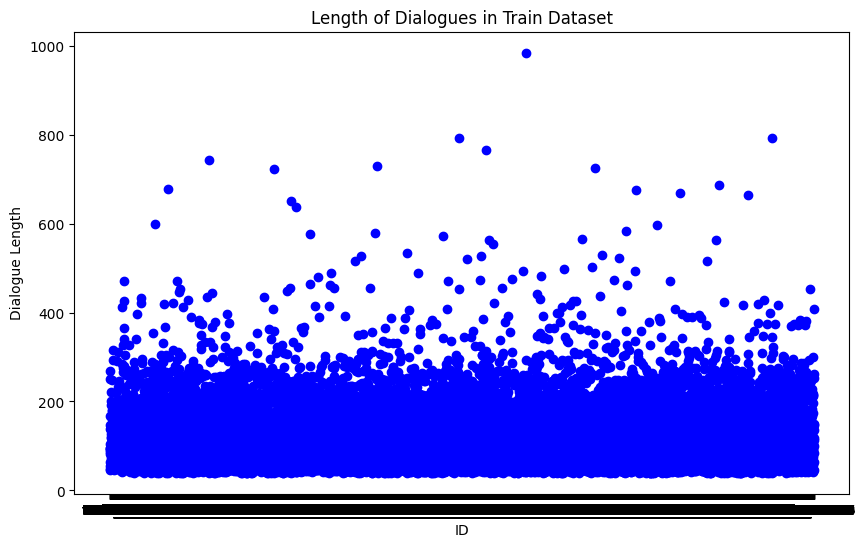

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['id'], train_data['dialogue_length'], color='blue')
plt.xlabel('ID')
plt.ylabel('Dialogue Length')
plt.title('Length of Dialogues in Train Dataset')
plt.show()

As we can see in the above graph, the dialogue lengths are mostly below 400 length with a few exceptions.

In [16]:
train_data['summary_length'] = train_data['summary'].apply(lambda x: len(x.split()))

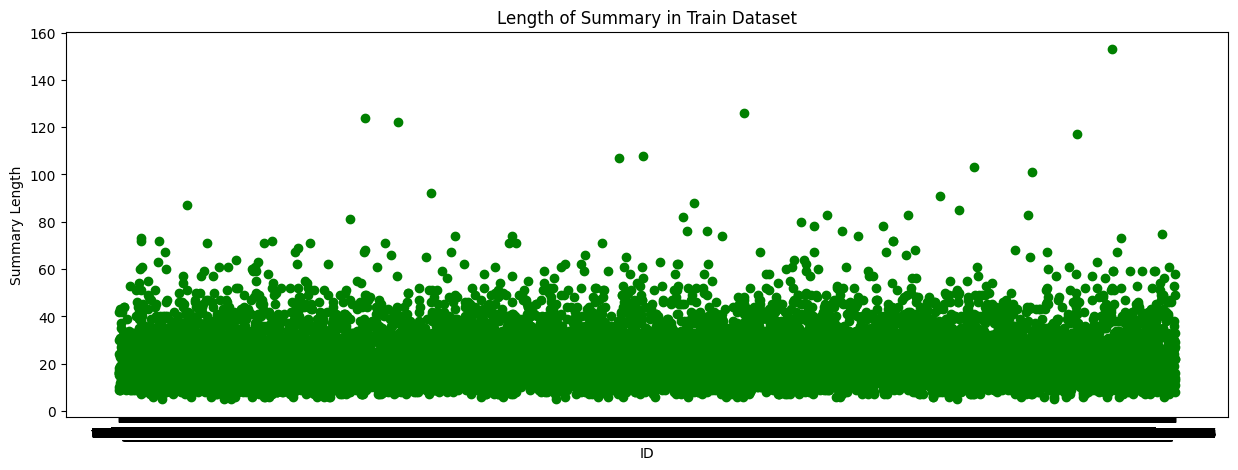

In [30]:
plt.figure(figsize=(15, 5))
plt.scatter(train_data['id'], train_data['summary_length'], color='green')
plt.xlabel('ID')
plt.ylabel('Summary Length')
plt.title('Length of Summary in Train Dataset')
plt.show()

In [13]:
meanDialogueLength = train_data["dialogue_length"].mean()
meanDialogueLength

130.98699839486358

In [17]:
meanSummaryLength = train_data["summary_length"].mean()
meanSummaryLength

22.867656500802568

In [18]:
print("Text summary is reduced by", round((meanDialogueLength-meanSummaryLength)/meanDialogueLength*100, 3),"%")

Text summary is reduced by 82.542 %


For text summarizer we will take a look at BART (Bidirectional and Auto-Regressive Transformers) introduced by Lewis et al.

In [19]:
#if not already downloaded then run
#pip install transformers

In [20]:
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import pipeline

In [21]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [23]:
ARTICLE = train_data["dialogue"][0]
print(summarizer(ARTICLE, max_length=40, min_length=20, do_sample=False))

[{'summary_text': "Dr. Hawkins sees Mr. Smith for a check-up. He finds he hasn't had one in 5 years. Smoking is the leading cause of lung cancer and heart disease."}]


In [25]:
test_data

id                                           dialogue  \
0       test_0_1  #Person1#: Ms. Dawson, I need you to take a di...   
1       test_0_2  #Person1#: Ms. Dawson, I need you to take a di...   
2       test_0_3  #Person1#: Ms. Dawson, I need you to take a di...   
3       test_1_1  #Person1#: You're finally here! What took so l...   
4       test_1_2  #Person1#: You're finally here! What took so l...   
...          ...                                                ...   
1495  test_498_2  #Person1#: Matthew? Hi!\n#Person2#: Steve! Hav...   
1496  test_498_3  #Person1#: Matthew? Hi!\n#Person2#: Steve! Hav...   
1497  test_499_1  #Person1#: Hey, Betsy, did you hear the great ...   
1498  test_499_2  #Person1#: Hey, Betsy, did you hear the great ...   
1499  test_499_3  #Person1#: Hey, Betsy, did you hear the great ...   

                                                summary  \
0     Ms. Dawson helps #Person1# to write a memo to ...   
1     In order to prevent employees from wasting tim...   
2     Ms. Dawson takes a dictation for #Person1# abo...   
3     #Person2# arrives late because of traffic jam....   
4     #Person2# decides to follow #Person1#'s sugges...   
...                                                 ...   
1495  Matthew and Steve meet after a long time. Stev...   
1496  Steve has been looking for a place to live. Ma...   
1497  Frank invites Besty to the party to celebrate ...   
1498  Frank invites Betsy to the big promotion party...   
1499  Frank invites Betsy to his party for his promo...   

                           topic  
0           communication method  
1                 company policy  
2                      dictation  
3          public transportation  
4                 transportation  
...                          ...  
1495             finding a house  
1496                find a house  
1497            party invitation  
1498  promotion party invitation  
1499            party invitation  

[1500 rows x 4 columns]

In [27]:
for index, row in test_data.head(10).iterrows():
    dialogue = row['dialogue']

    summary = summarizer(dialogue, max_length=40, min_length=20, do_sample=False)

    test_data.at[index, 'BART_summary'] = summary[0]['summary_text']

In [31]:
test_data.head(10)[['dialogue','BART_summary']]

dialogue  \
0  #Person1#: Ms. Dawson, I need you to take a di...   
1  #Person1#: Ms. Dawson, I need you to take a di...   
2  #Person1#: Ms. Dawson, I need you to take a di...   
3  #Person1#: You're finally here! What took so l...   
4  #Person1#: You're finally here! What took so l...   
5  #Person1#: You're finally here! What took so l...   
6  #Person1#: Kate, you never believe what's happ...   
7  #Person1#: Kate, you never believe what's happ...   
8  #Person1#: Kate, you never believe what's happ...   
9  #Person1#: Happy Birthday, this is for you, Br...   

                                        BART_summary  
0  The use of Instant Message programs by employe...  
1  The use of Instant Message programs by employe...  
2  The use of Instant Message programs by employe...  
3  Drivers in Paris talk about driving to work. O...  
4  Drivers in Paris talk about driving to work. O...  
5  Drivers in Paris talk about driving to work. O...  
6  Masha and Hero are getting divorced. #Person1#...  
7  Masha and Hero are getting divorced. #Person1#...  
8  Masha and Hero are getting divorced. #Person1#...  
9  Brian is invited to a party to celebrate his b...

In [32]:
test_data['dialogue_length'] = test_data['dialogue'].apply(len)
test_data['BART_summary_length'] = test_data['BART_summary'].apply(len)

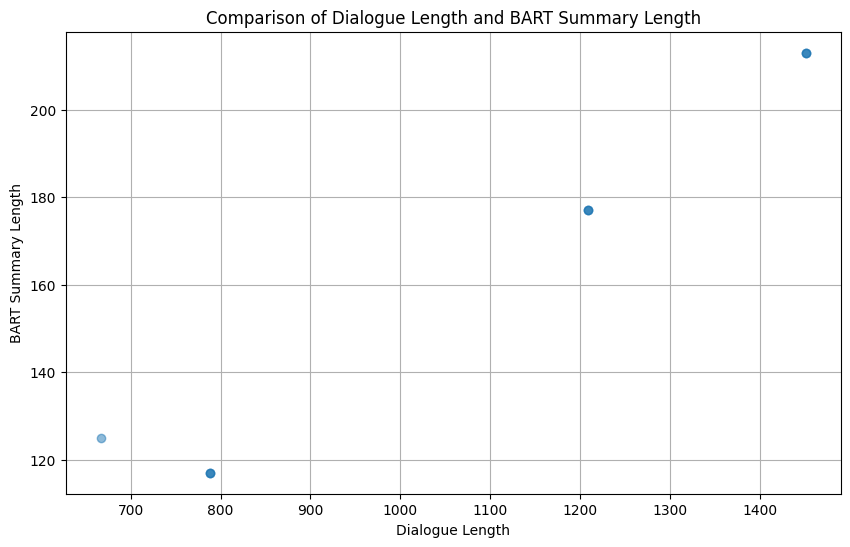

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(test_data.head(10)['dialogue_length'], test_data.head(10)['BART_summary_length'], alpha=0.5)
plt.title('Comparison of Dialogue Length and BART Summary Length')
plt.xlabel('Dialogue Length')
plt.ylabel('BART Summary Length')
plt.grid(True)
plt.show()